# Data Preprocessing and Multiple linear regression
> optimizing the data to make gradient descent process faster

### Introduction
While making multiple linear regression, i'll study Feature scaling, learning rate, feature engineering, and how `X_train` works compared to single linear regression.

1. dataset
2. useful tools
3. 

#### 1. Dataset
I'll use "Medical Cost Personal Datasets" from 'Kaggle', but only for 400 smaples, and without 'children', 'region' properties.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [18]:
# 데이터를 불러온 뒤 피처와 타깃으로 분류
df = pd.read_csv('data.txt')
X_features = ['age', 'sex', 'bmi', 'smoker']
print(df.head())

# Lable Encoding: 범주형 데이터를 이진 벡터로 표현
df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})

print("--\n", "after label encoding")
X_train = df[['age', 'sex', 'bmi', 'smoker']]
print("X_train\n", X_train.head())
y_train = df['charges']
print("y_train\n", y_train.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
--
 after label encoding
X_train
    age  sex     bmi  smoker
0   19    0  27.900       1
1   18    1  33.770       0
2   28    1  33.000       0
3   33    1  22.705       0
4   32    1  28.880       0
y_train
 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


/var/folders/2v/b65115v14cvgvjztf82wr9x80000gn/T/ipykernel_47015/2044807528.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 1, 'female': 0})
/var/folders/2v/b65115v14cvgvjztf82wr9x80000gn/T/ipykernel_47015/2044807528.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})


In [3]:
# 데이터프레임을 Numpy 배열로 변환
X_tr = X_train.to_numpy()
y_tr = y_train.to_numpy()

print(X_tr.shape)
print(X_tr[:4])

(400, 4)
[[19.     0.    27.9    1.   ]
 [18.     1.    33.77   0.   ]
 [28.     1.    33.     0.   ]
 [33.     1.    22.705  0.   ]]


### Feature scaling using "Z-score normalization"
To make all features upgrade through equal progress

$$z = (x - \mu )/\sigma$$
$$\mu_j = \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j $$
$$\sigma^2_j = \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2$$

In [4]:
# normalize features 'age', and 'bmi'

age_mu, _, bmi_mu, _ = np.mean(X_tr, axis=0)
print(age_mu, bmi_mu)
age_std, _, bmi_std, _ = np.std(X_tr, axis = 0)
print(age_std, bmi_std)

X_tr[:, 0] = (X_tr[:, 0] - age_mu) / age_std
print(np.sum(X_tr[:, 0]))
X_tr[:, 2] = (X_tr[:, 2] - bmi_mu) / bmi_std
print(np.sum(X_tr[:, 2]))

39.4175 30.6101625
14.454867476044186 5.691951590719456
8.881784197001252e-14
-9.059419880941277e-14


In [16]:
# Print X and y after normalizing features

print(X_tr[:10])
print(y_tr[:10])

[[-1.41249998  0.         -0.47613941  1.        ]
 [-1.48168083  1.          0.55514132  0.        ]
 [-0.78987234  1.          0.41986258  0.        ]
 [-0.4439681   1.         -1.38883165  0.        ]
 [-0.51314895  1.         -0.30396648  0.        ]
 [-0.58232979  0.         -0.85562261  0.        ]
 [ 0.45538294  0.          0.49716472  0.        ]
 [-0.1672447   0.         -0.50424928  0.        ]
 [-0.1672447   1.         -0.13706415  0.        ]
 [ 1.42391482  0.         -0.83805395  0.        ]]
[16884.924    1725.5523   4449.462   21984.47061  3866.8552   3756.6216
  8240.5896   7281.5056   6406.4107  28923.13692]


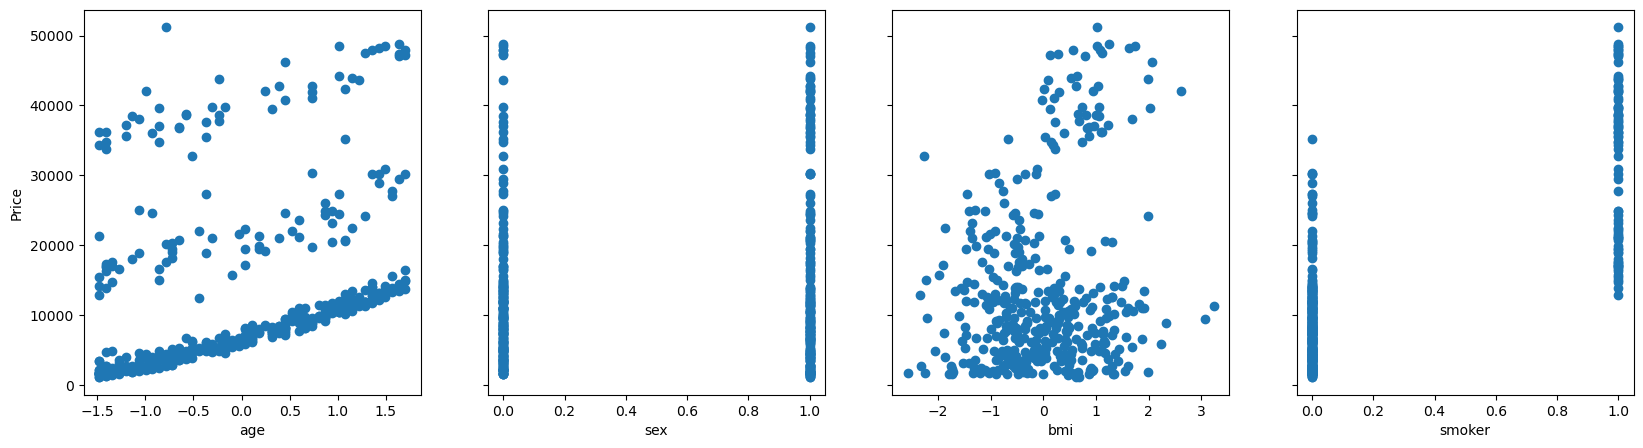

In [ ]:
# plotting each feature versus price

fig,ax=plt.subplots(1, 4, figsize=(20, 5), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_tr[:,i],y_tr)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price")
plt.show()

plotting each feature vs. price provides some indicates of which features have influence on price.
increasing age, bmi seems to make increasing price.
Also, smokers have much price than someone who are not smoker

### Gradient Descent With Multiple Variable

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$
* m is the number of training examples in the data set
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [52]:
# Function to calculate the cost
def compute_cost(x, y, w, b):

    m = x.shape[0]      # m-vector
    cost = 0

    for i in range(m):
        f_wb = w @ x[i] + b
        cost += (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [44]:
# Function to compute the gradient of cost function
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m, n)): Data, m examples with n features
      y (ndarray (m,))  : target values
      w (ndarray (n,))  : model parameters
      b (scalar)        : model parameter
    Returns
      dj_dw (ndarray (, n)): The gradient of the cost w.r.t. the parameter w
      dj_db (scalar)       : The gradient of the cost w.r.t. the parameter b
    """

    # Number of training examples

    m, n = x.shape

    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        error = w @ x[i] + b - y[i]
        dj_dw += error * x[i] 
        dj_db += error
    return dj_dw / m , dj_db / m

In [47]:
w = np.ones(4)
print(compute_gradient(X_tr, y_tr, w, 1))

(array([-3922.10410495, -7612.39197116, -2317.00571087, -7005.65796873]), np.float64(-13709.802365075))


In [59]:
# Function to compute gradient descent
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b.
    Updates w, b by taking num_iters gradient steps learning rate alpha

    Args:
      x (ndarray (m, n))  : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,))): initial values of model parameter
      b_in (scalar)       : initial values of model parameter
      alpha (float)       : learning rate
      num_iters (int)     : number of iterators to run gradient descent
      cost_function       : function to call to produce cost
      gradient_function   : function to call to produce gradient

    Returns:
      w (ndarrat (n,)): updated value of parameter after running gradient descent
      b (scalar)      : updated value of parameter after running gradient descent
      J_history (list): History of cost values
      p_history (list): History of parameters [w,b]
    """

    # An array to store cost J and w's at each iteration

    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Update Parameters using equation (3) and (4) above
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<10000:       # prevent resource exhaustion
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])
        # print cost every at intervals 10 times or as many iterations if < 10
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db: 0.3e} ",
                  f"w: {w}, b: {b: 0.5e}")
    return w, b, J_history, p_history   # return 

In [66]:
# Initialize parameters
w_init = np.zeros(4)
b_init = 0

# Some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-1

# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_tr, y_tr, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final}, {b_final:8.4f})")

Iteration    0: Cost 1.40e+08  dj_dw: [-3923.1618349  -7613.51032225 -2318.11177727 -7006.22436372], dj_db: -1.371e+04  w: [392.31618349 761.35103222 231.81117773 700.62243637], b:  1.37115e+03
Iteration 1000: Cost 1.83e+07  dj_dw: [-2.88161982e-06  4.09887529e-05  5.32037792e-07 -2.87787971e-04], dj_db:  5.089e-05  w: [ 4050.12366428   807.89355095  1880.30780747 23401.62507028], b:  8.15720e+03
Iteration 2000: Cost 1.83e+07  dj_dw: [-2.17596607e-12  3.76985554e-12  9.06084097e-13 -2.55658961e-11], dj_db:  4.479e-12  w: [ 4050.12368193   807.89330332  1880.30780421 23401.62682468], b:  8.15720e+03
Iteration 3000: Cost 1.83e+07  dj_dw: [-1.78033588e-12  5.68434189e-13  8.46966941e-13 -1.78351911e-11], dj_db:  1.621e-12  w: [ 4050.12368193   807.89330332  1880.30780421 23401.62682468], b:  8.15720e+03
Iteration 4000: Cost 1.83e+07  dj_dw: [-1.78033588e-12  5.68434189e-13  8.46966941e-13 -1.78351911e-11], dj_db:  1.621e-12  w: [ 4050.12368193   807.89330332  1880.30780421 23401.62682468]

`dj_dw`와 `dj_db`의 값이 이미 `e-12`와 같이 매우 작은 값을 갖고있어 w와 b에 유의미한 변화가 보이지 않는다.
또한 비용은 10의 7승으로 매우 큰 값을 보여준다.

비용이 큰 값을 나타내는 예상 이유로는 틀린 모델 선택과 국소값, local minimum, 이다.

챗지피티는 변수간 상호작용 여부를 파악하고 모델은 다른 모델을 선택할 것을 추천한다.

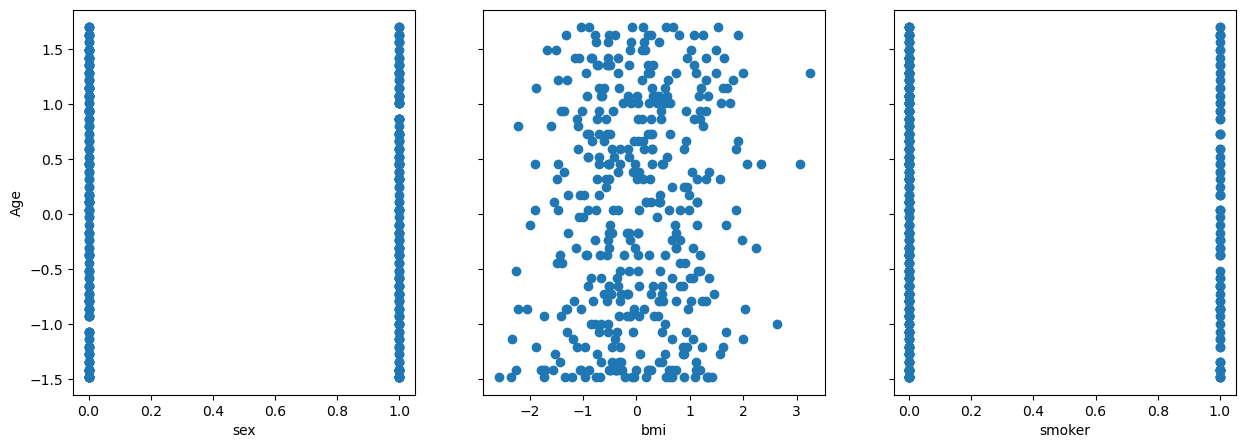

In [75]:
# plotting each feature versus price

fig,ax=plt.subplots(1, 3, figsize=(15, 5), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_tr[:,i + 1],X_tr[:,0])
    ax[i].set_xlabel(X_features[i + 1])
ax[0].set_ylabel("Age")
plt.show()    

나이와 나머지 세 개의 특성들과의 상관관계가 유의미해 보이지는 않는다. 다만, 나이와 bmi지수는 비례 관계에 있어보인다.

해당 데이터에 0.87의 정확도를 갖는 모델은 결정트리회귀분석을 사용했다.